In [55]:
# Importing Libraries

import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [56]:
# Loading the dataset

df=pd.read_csv("/content/employee_salaries.csv")

In [57]:
df.head()

,employee_id,job_role,experience_years,education_level,gender,skills_score,salary
0,1,Manager,19,Masters,Female,99,116372
1,2,HR,15,Bachelors,Female,79,85611
2,3,Software Engineer,12,Bachelors,Male,60,86897
3,4,HR,18,Bachelors,Male,67,100107
4,5,HR,16,PhD,Male,50,94086


In [58]:
df.tail()

,employee_id,job_role,experience_years,education_level,gender,skills_score,salary
495,496,Data Scientist,12,Bachelors,Female,61,86060
496,497,Software Engineer,1,PhD,Male,94,84472
497,498,Data Scientist,18,Bachelors,Male,72,107850
498,499,Data Scientist,18,Bachelors,Female,56,104775
499,500,Data Scientist,3,Masters,Male,63,70606


In [59]:
df.shape

(500, 7)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   employee_id       500 non-null    int64 
 1   job_role          500 non-null    object
 2   experience_years  500 non-null    int64 
 3   education_level   500 non-null    object
 4   gender            500 non-null    object
 5   skills_score      500 non-null    int64 
 6   salary            500 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 27.5+ KB


In [61]:
# Checking if the duplicate values are present

df.duplicated().sum()

np.int64(0)

In [62]:
# Checking if the NULL values are present

df.isnull().sum()

,0
employee_id,0
job_role,0
experience_years,0
education_level,0
gender,0
skills_score,0
salary,0


In [63]:
df.describe()

,employee_id,experience_years,skills_score,salary
count,500.000000,500.00000,500.000000,500.000000
mean,250.500000,9.75800,70.408000,85660.614000
std,144.481833,6.13602,17.338708,15976.987282
min,1.000000,0.00000,40.000000,41827.000000
25%,125.750000,4.00000,56.000000,73981.000000
50%,250.500000,10.00000,70.000000,84622.000000
75%,375.250000,15.00000,85.250000,96930.000000
max,500.000000,20.00000,100.000000,129836.000000


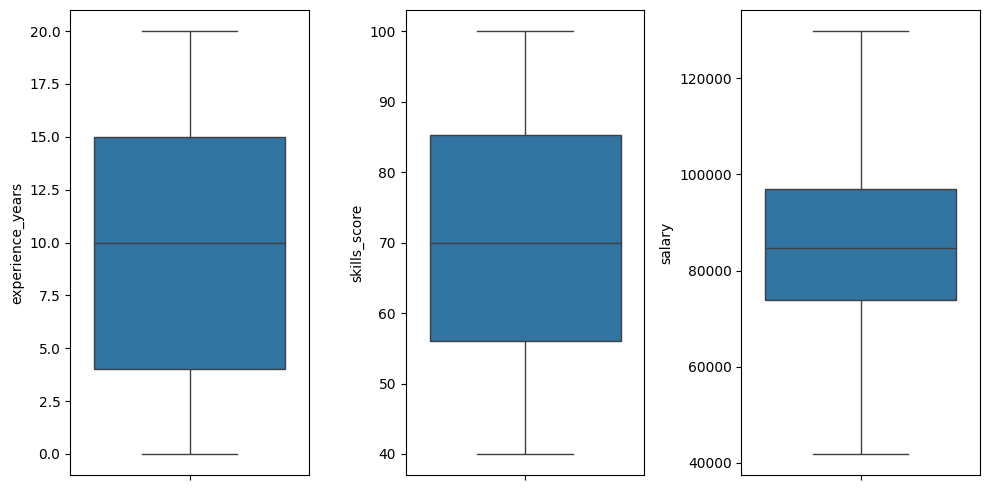

In [64]:
# Checking for outliers

plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.boxplot(df['experience_years'])
plt.subplot(1,3,2)
sns.boxplot(df['skills_score'])
plt.subplot(1,3,3)
sns.boxplot(df['salary'])
plt.tight_layout()
plt.show()

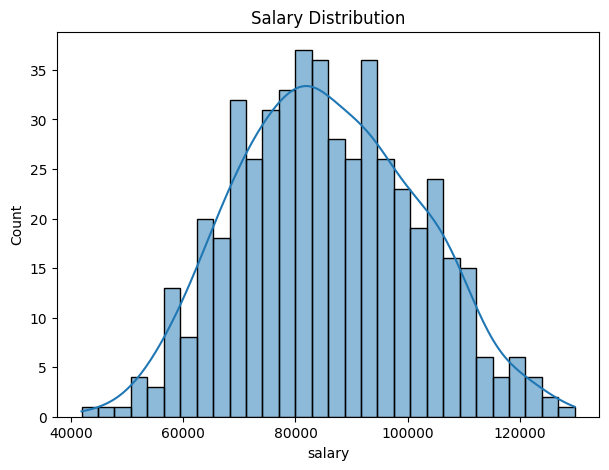

In [65]:
# Salary Distribution

plt.figure(figsize=(7,5))
sns.histplot(df['salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.show()

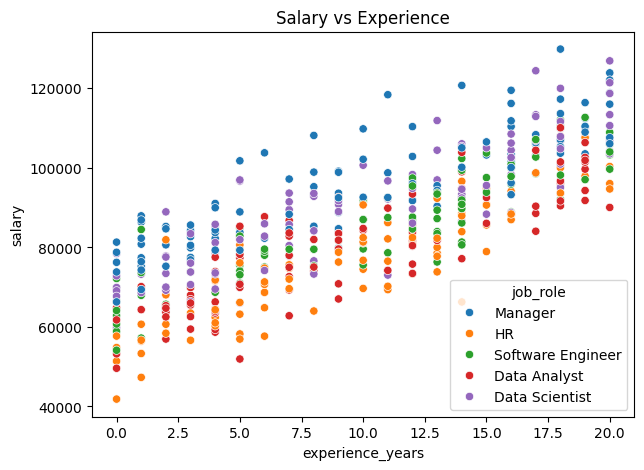

In [66]:
# Salary vs Experience

plt.figure(figsize=(7,5))
sns.scatterplot(x="experience_years", y="salary", hue="job_role", data=df)
plt.title("Salary vs Experience")
plt.show()

/tmp/ipython-input-3761353312.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="gender", y="salary", data=df, estimator=np.mean, ci=None)


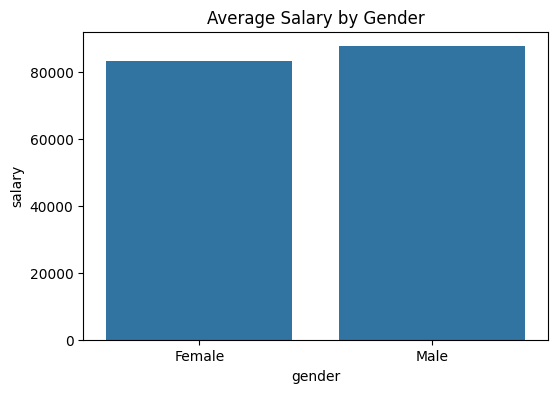

In [67]:
# Average Salary by Gender

plt.figure(figsize=(6,4))
sns.barplot(x="gender", y="salary", data=df, estimator=np.mean, ci=None)
plt.title("Average Salary by Gender")
plt.show()

/tmp/ipython-input-2862514146.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="job_role", y="salary", data=df, estimator=np.mean, ci=None)


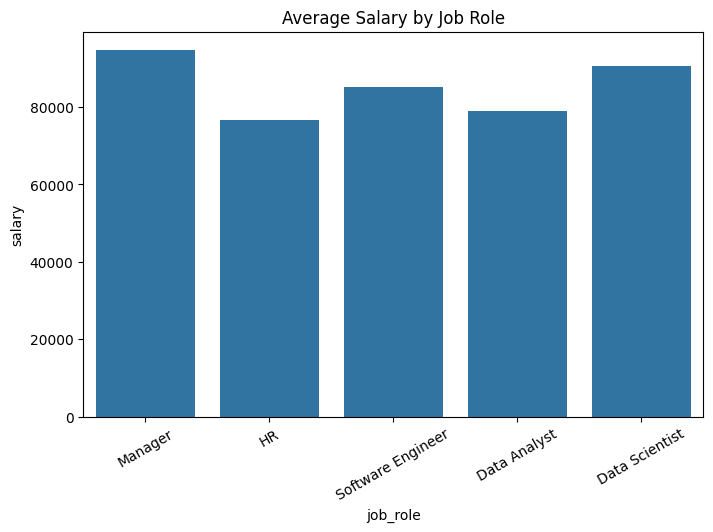

In [68]:
# Average Salary by Job Role

plt.figure(figsize=(8,5))
sns.barplot(x="job_role", y="salary", data=df, estimator=np.mean, ci=None)
plt.title("Average Salary by Job Role")
plt.xticks(rotation=30)
plt.show()

In [69]:
df.columns

Index(['employee_id', 'job_role', 'experience_years', 'education_level',
       'gender', 'skills_score', 'salary'],
      dtype='object')

In [70]:
# Encode categorical variables

cat_cols=df.select_dtypes(include="object").columns
le=LabelEncoder()
for col in cat_cols:
  df[col]=le.fit_transform(df[col])

In [71]:
x=df.drop(columns=["employee_id","salary"])
x

,job_role,experience_years,education_level,gender,skills_score
0,3,19,1,0,99
1,2,15,0,0,79
2,4,12,0,1,60
3,2,18,0,1,67
4,2,16,2,1,50
...,...,...,...,...,...
495,1,12,0,0,61
496,4,1,2,1,94
497,1,18,0,1,72
498,1,18,0,0,56


In [72]:
y=df['salary']
y

,salary
0,116372
1,85611
2,86897
3,100107
4,94086
...,...
495,86060
496,84472
497,107850
498,104775


In [73]:
# Splitting the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [74]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 5), (100, 5), (400,), (100,))

In [75]:
# Train linear regression model

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [76]:
predict_train=lr.predict(x_train)

In [77]:
predict_test=lr.predict(x_test)

In [78]:
Rmse_train=math.sqrt(mean_squared_error(y_train,predict_train))
print("RMSE for training data:", Rmse_train)

RMSE for training data: 7917.141046312836


In [79]:
Rmse_test=math.sqrt(mean_squared_error(y_test,predict_test))
print("RMSE for testing data:", Rmse_test)

RMSE for testing data: 7532.130567123003


In [80]:
# R2-Score for training data

R2_score_train=r2_score(y_train,predict_train)
print("R2-Score for training data:", R2_score_train)

R2-Score for training data: 0.7524777042743457


In [81]:
# R2-Score for testing data

R2_score_test=r2_score(y_test,predict_test)
print("R2-Score for testing data:", R2_score_test)

R2-Score for testing data: 0.7812365502862471


In [82]:
# Feature Importance

coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": lr.coef_
})

coefficients

,Feature,Coefficient
0,job_role,1407.939315
1,experience_years,2022.395953
2,education_level,5502.430171
3,gender,1164.876237
4,skills_score,174.439097


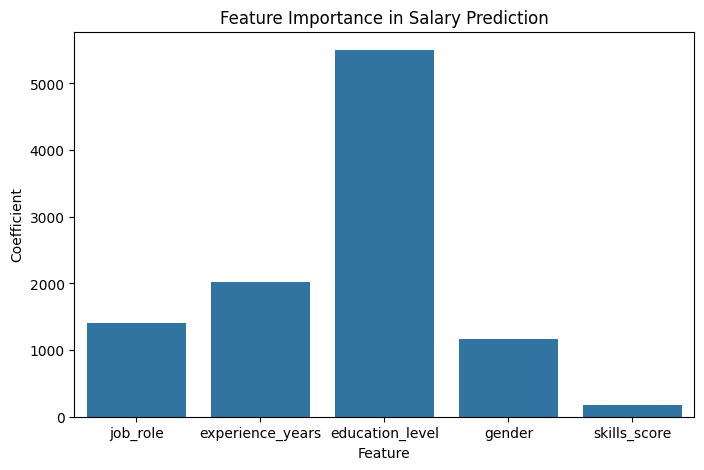

In [83]:
#Feature Importance in Salary Prediction

plt.figure(figsize=(8,5))
sns.barplot(x="Feature", y="Coefficient", data=coefficients)
plt.title("Feature Importance in Salary Prediction")
plt.show()